注意力机制：如何将注意力机制运用到机器学习中，以及他的思想

In [20]:
import torch
from torch import nn
from d2l import torch as d2l

In [21]:
x, _ = torch.sort(torch.rand(50), dim=0)
x

tensor([0.0338, 0.0365, 0.0866, 0.0909, 0.1126, 0.1713, 0.1958, 0.2070, 0.2469,
        0.2907, 0.3203, 0.3241, 0.3484, 0.3503, 0.3566, 0.4077, 0.4140, 0.4272,
        0.4528, 0.4529, 0.4621, 0.4706, 0.5048, 0.5537, 0.5864, 0.5957, 0.5978,
        0.6056, 0.6255, 0.6257, 0.6505, 0.6737, 0.6906, 0.6985, 0.7063, 0.7132,
        0.7138, 0.7375, 0.7413, 0.7432, 0.7774, 0.7788, 0.8652, 0.8749, 0.8812,
        0.8870, 0.9250, 0.9465, 0.9584, 0.9841])

In [22]:
n_train = 50  # 训练样本数
# torch.rand 是 PyTorch 中用于生成均匀分布在 [0, 1) 区间内随机数的函数
# torch.sort可以选择按第几维排序，返回一个命名元组 (values, indices), 如果返回值直接使用x_train没有_那么x_train将会是一个元组
x_train, _ = torch.sort(torch.rand(n_train) * 5)   # 排序后的训练样本

def f(x):
    return 2 * torch.sin(x) + x**0.8
# torch.normal 是 PyTorch 中用于生成服从正态分布（高斯分布）随机数的函数
y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,))  # 训练样本的输出
x_test = torch.arange(0, 5, 0.1)  # 测试样本
y_truth = f(x_test)  # 测试样本的真实输出
n_test = len(x_test)  # 测试样本数
n_test

50

In [23]:
def plot_kernel_reg(y_hat):
    d2l.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'],
             xlim=[0, 5], ylim=[-1, 5])
    d2l.plt.plot(x_train, y_train, 'o', alpha=0.5)

用最简单的平均汇聚来就行预测，效果显然很差

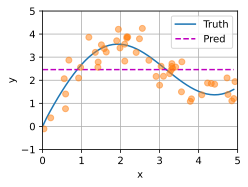

In [24]:
y_hat = torch.repeat_interleave(y_train.mean(), n_test)
plot_kernel_reg(y_hat)

In [25]:
# X_repeat的形状:(n_test,n_train),
# 每一行都包含着相同的测试输入（例如：同样的查询）
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
X_repeat,X_repeat.shape

(tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
         [0.2000, 0.2000, 0.2000,  ..., 0.2000, 0.2000, 0.2000],
         ...,
         [4.7000, 4.7000, 4.7000,  ..., 4.7000, 4.7000, 4.7000],
         [4.8000, 4.8000, 4.8000,  ..., 4.8000, 4.8000, 4.8000],
         [4.9000, 4.9000, 4.9000,  ..., 4.9000, 4.9000, 4.9000]]),
 torch.Size([50, 50]))

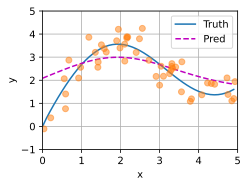

In [26]:
# X_repeat的形状:(n_test,n_train),
# 每一行都包含着相同的测试输入（例如：同样的查询）
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
# x_train包含着键。attention_weights的形状：(n_test,n_train),
# 每一行都包含着要在给定的每个查询的值（y_train）之间分配的注意力权重
attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1)
# y_hat的每个元素都是值的加权平均值，其中的权重是注意力权重
y_hat = torch.matmul(attention_weights, y_train)
plot_kernel_reg(y_hat)

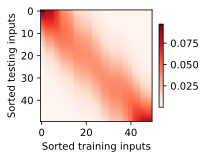

In [27]:
d2l.show_heatmaps(attention_weights.unsqueeze(0).unsqueeze(0),
                  xlabel='Sorted training inputs',
                  ylabel='Sorted testing inputs')